# Ecommerce Customer Churn Exploratory Data Analysis

This is a customer churn reduction project at a leading E-commerce company. The company wants to know the customers who are going to churn, so accordingly they can approach customer to offer some promos.

The dataset can be downloaded from here: https://www.kaggle.com/datasets/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction

The main steps in this notebook are:

1. Load required packages and datasets
2. Exploratory data analysis

---

## 1. Load required packages and datasets

In [72]:
# Import packages
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import pandas as pd
import numpy as np
from scipy import stats
from datetime import datetime
import calendar
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns 

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set_theme(color_codes=True)

In [73]:
# Load the data
df = pd.read_excel('/Users/huykha/datasets/ecommerce-customer-churn/ecommerce-churn-dataset.xlsx', sheet_name='E Comm')

---

## Exploratory data analysis

### Data overview

In [74]:
display(df)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,150.71
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,224.91
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186.42
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,178.90


### Quick summary of the dataset

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

### Transforming data type into the right format

There are several other columns which have numbers in them but do not represent a count, including Churn, CityTier and Complain. Let's change them into the categorical variables.

In [ ]:
df['CustomerID'] = df['CustomerID'].astype('object')
df['Churn'] = df['Churn'].astype('object')
df['CityTier'] = df['CityTier'].astype('object')
df['Complain'] = df['Complain'].astype('object')
df.dtypes

CustomerID                       int64
Churn                           object
Tenure                         float64
PreferredLoginDevice            object
CityTier                        object
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                        object
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                 float64
dtype: object

### Checking for missing data

In [77]:
# Check for missing data
for col in df.columns:
    if df[col].isnull().sum() > 0:
        print(col)
        print(f'The number of missing values for {col}: ', df[col].isnull().sum())
        print(f'Datatype: ', df[col].dtypes)
        print()

Tenure
The number of missing values for Tenure:  264
Datatype:  float64

WarehouseToHome
The number of missing values for WarehouseToHome:  251
Datatype:  float64

HourSpendOnApp
The number of missing values for HourSpendOnApp:  255
Datatype:  float64

OrderAmountHikeFromlastYear
The number of missing values for OrderAmountHikeFromlastYear:  265
Datatype:  float64

CouponUsed
The number of missing values for CouponUsed:  256
Datatype:  float64

OrderCount
The number of missing values for OrderCount:  258
Datatype:  float64

DaySinceLastOrder
The number of missing values for DaySinceLastOrder:  307
Datatype:  float64



### Creating subgroups of categorical variables and numerical variables

In [78]:
categorical_variables = []
numerical_variables = []
for i in df.columns:
  if df[i].dtype=='object':
    categorical_variables.append(i)
  else:
    numerical_variables.append(i)
print('Categorical variables: ', categorical_variables)
print('Numerical variables: ', numerical_variables)

Categorical variables:  ['Churn', 'PreferredLoginDevice', 'CityTier', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus', 'Complain']
Numerical variables:  ['CustomerID', 'Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']


### Checking for distinct values in categorical columns

In [ ]:
# Check the number of distinct values of each column
for col in categorical_variables:
    # Ignore CustomerID column
    if col == 'CustomerID': 
        continue
    print(col)
    print(f"Number of distinct values for {col}: ", df[col].nunique())
    print(f"The distinct values for {col}: ", df[col].unique())
    print()

Churn
Number of distinct values for Churn:  2
The distinct values for Churn:  [1 0]

PreferredLoginDevice
Number of distinct values for PreferredLoginDevice:  3
The distinct values for PreferredLoginDevice:  ['Mobile Phone' 'Phone' 'Computer']

CityTier
Number of distinct values for CityTier:  3
The distinct values for CityTier:  [3 1 2]

PreferredPaymentMode
Number of distinct values for PreferredPaymentMode:  7
The distinct values for PreferredPaymentMode:  ['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']

Gender
Number of distinct values for Gender:  2
The distinct values for Gender:  ['Female' 'Male']

PreferedOrderCat
Number of distinct values for PreferedOrderCat:  6
The distinct values for PreferedOrderCat:  ['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']

MaritalStatus
Number of distinct values for MaritalStatus:  3
The distinct values for MaritalStatus:  ['Single' 'Divorced' 'Married']

Complain
Number of distinct values f

### Descriptive statistics

In [80]:
df.describe()

,CustomerID,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5366.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,10.189899,15.639896,2.931535,3.688988,3.066785,4.214032,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,8.557241,8.531475,0.721926,1.023999,1.380194,2.583586,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,5.000000,0.000000,1.000000,1.000000,1.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,2.000000,9.000000,2.000000,3.000000,2.000000,2.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,9.000000,14.000000,3.000000,4.000000,3.000000,3.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,16.000000,20.000000,3.000000,4.000000,4.000000,6.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,61.000000,127.000000,5.000000,6.000000,5.000000,22.000000,26.000000,16.000000,16.000000,46.000000,324.990000


### Visualizating five-number summary

Show the five-number summary (minimum score, first quartile, median, third quartile, and maximum score) for the numerical attributes by using box plots:

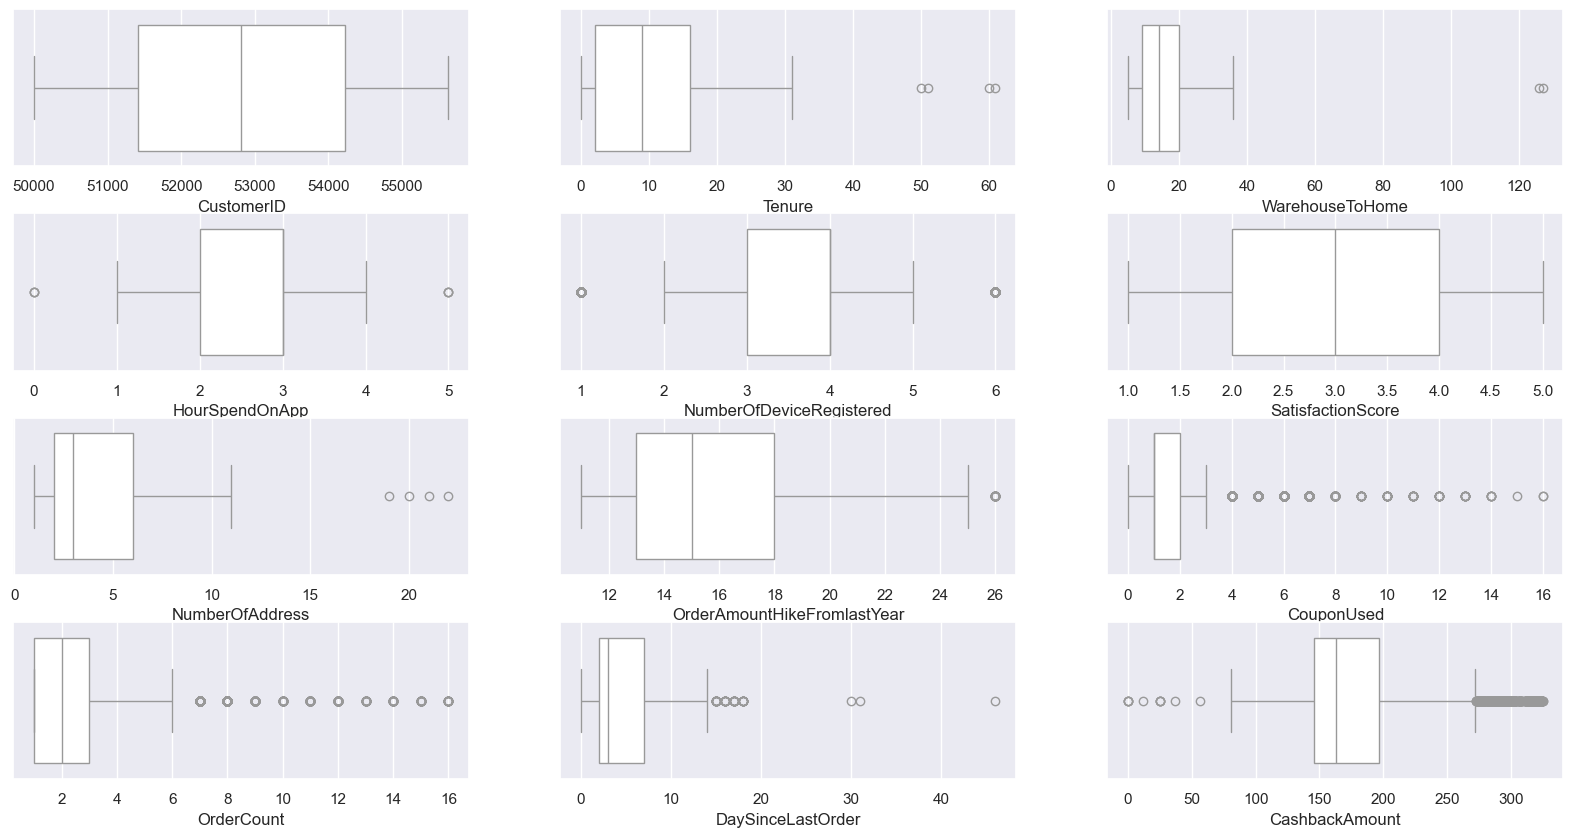

In [81]:
df_num_cols = df[numerical_variables]

fig, axes = plt.subplots(nrows = 4, ncols = 3, gridspec_kw =  dict(hspace=0.3), figsize = (20,10))

for ax,col in zip(axes.flatten(), df_num_cols.columns):
    sns.boxplot(x = df_num_cols[col], color='white', ax = ax)

plt.show()

### Frequency distribution of numerical variables

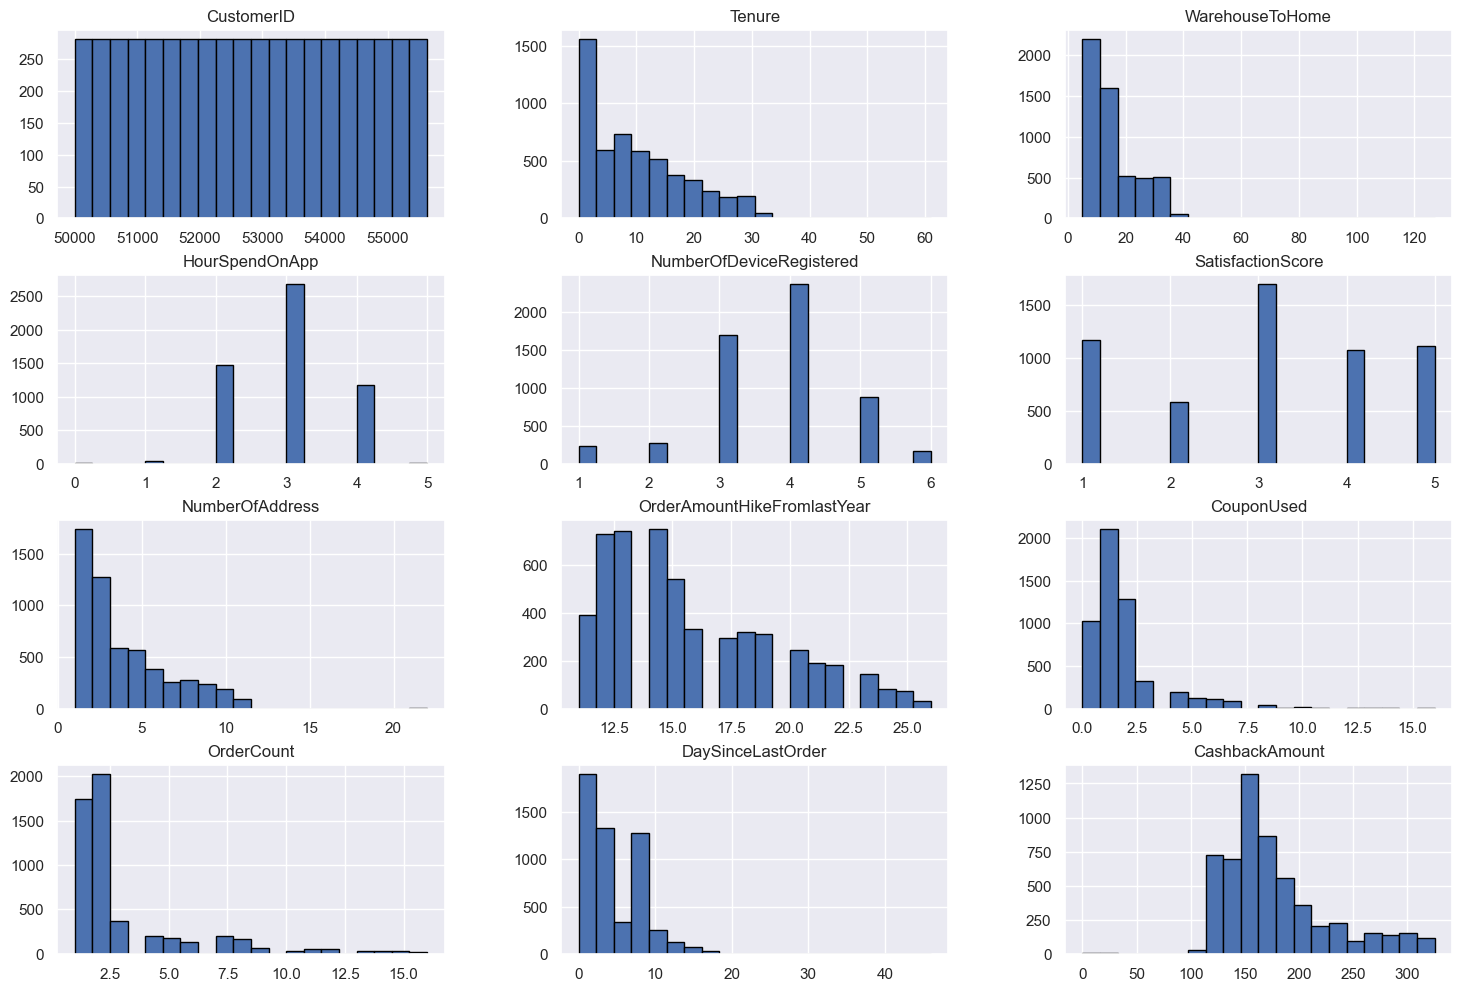

In [82]:
df[numerical_variables].hist(bins = 20, edgecolor = 'black', figsize= (18,12))
plt.show()

### Value distribution of categorical variables

In [83]:
df[categorical_variables].columns

Index(['Churn', 'PreferredLoginDevice', 'CityTier', 'PreferredPaymentMode',
       'Gender', 'PreferedOrderCat', 'MaritalStatus', 'Complain'],
      dtype='object')

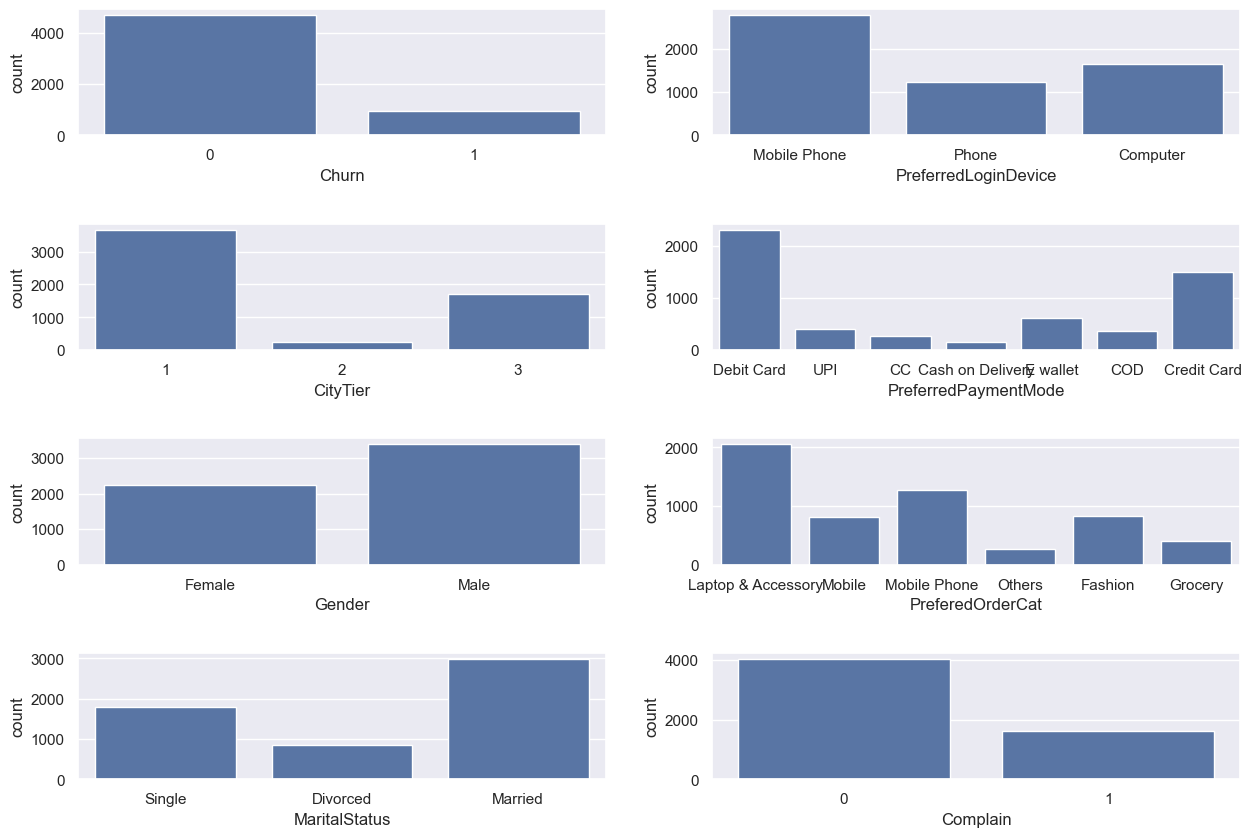

In [84]:
df_cat_cols = df[categorical_variables]

fig, axes = plt.subplots(4, 2, figsize=(15, 10))
for ax,col in zip(axes.flatten(), df_cat_cols.columns):
    sns.countplot(x = df_cat_cols[col], ax = ax)

fig.subplots_adjust(hspace=0.7)

plt.show()

### Distribution of churn and non-churn customers across categorical variables

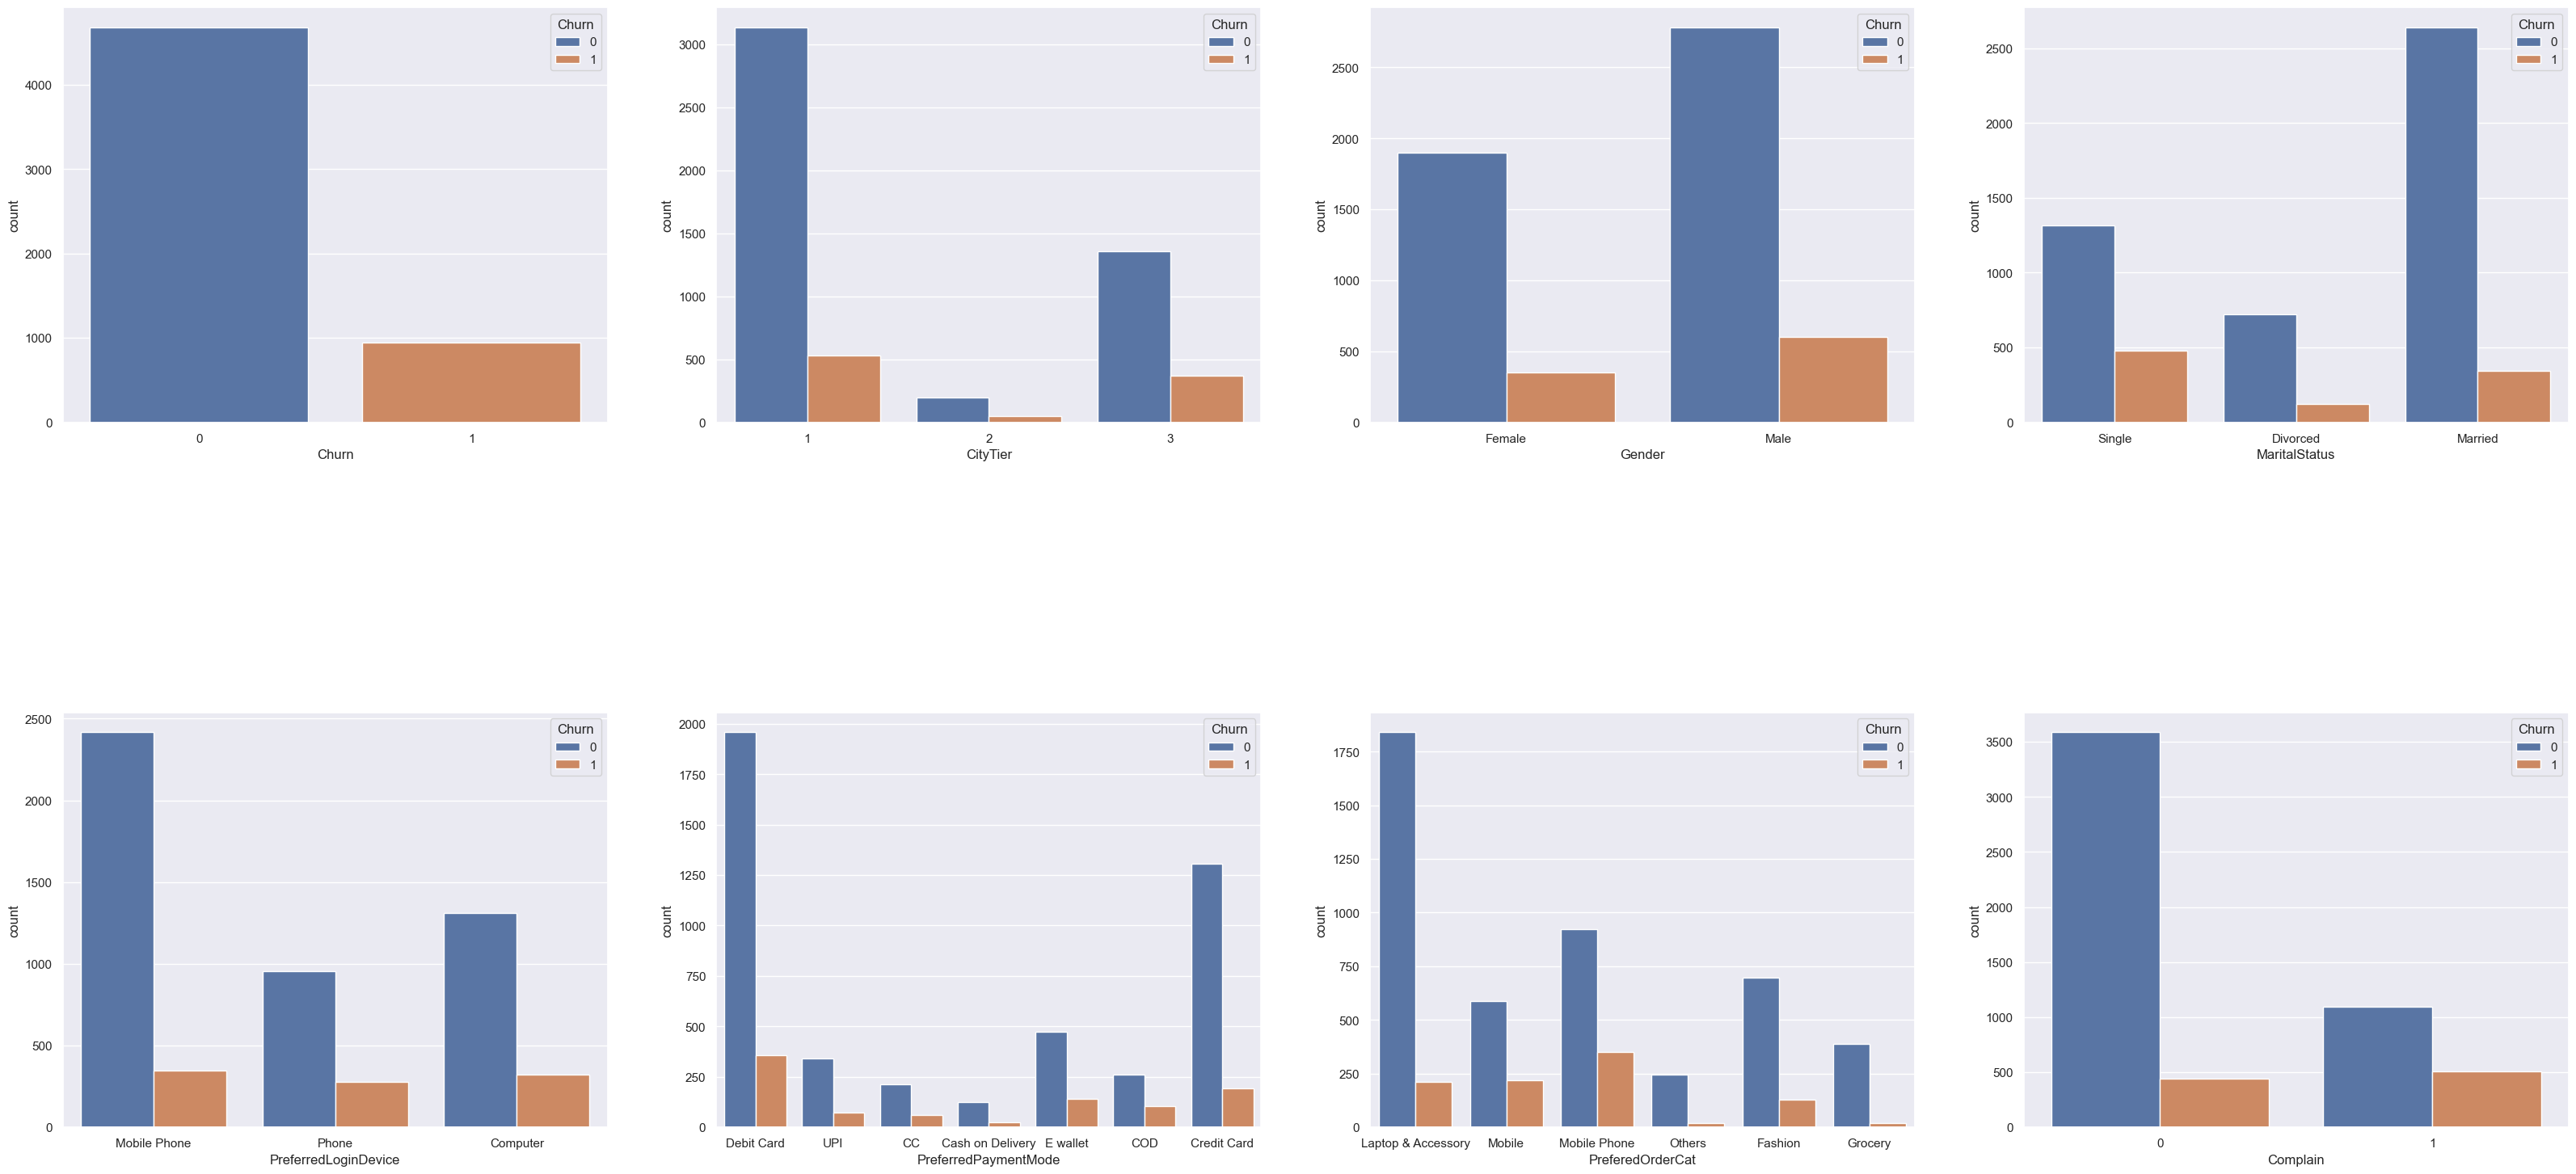

In [85]:
fig, axarr = plt.subplots(2, 4, figsize=(40, 18))
for ind, item in enumerate (df_cat_cols):
    sns.countplot(x = item, hue = 'Churn', data = df, ax = axarr[ind%2][ind//2])
fig.subplots_adjust(hspace=0.7)
plt.show()

### Deeper dive into categorical columns

In [86]:
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

#### Churn

In [89]:
churn = df[['CustomerID', 'Churn']]
churn.columns = ['', 'Churn']
churn_total = churn.groupby(churn['Churn']).count()
churn_percentage = churn_total / churn_total.sum() * 100

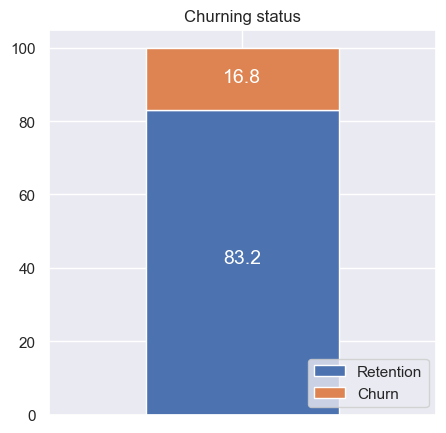

In [90]:
plot_stacked_bars(churn_percentage.transpose(), "Churning status", (5, 5), legend_="lower right")

About 17% of the total customers have churned.

#### CityTier

In [91]:
citytier = df[['CustomerID', 'CityTier', 'Churn']]
citytier = citytier.groupby([citytier['CityTier'], citytier['Churn']])['CustomerID'].count().unstack(level=1).fillna(0)
citytier_churn = (citytier.div(citytier.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

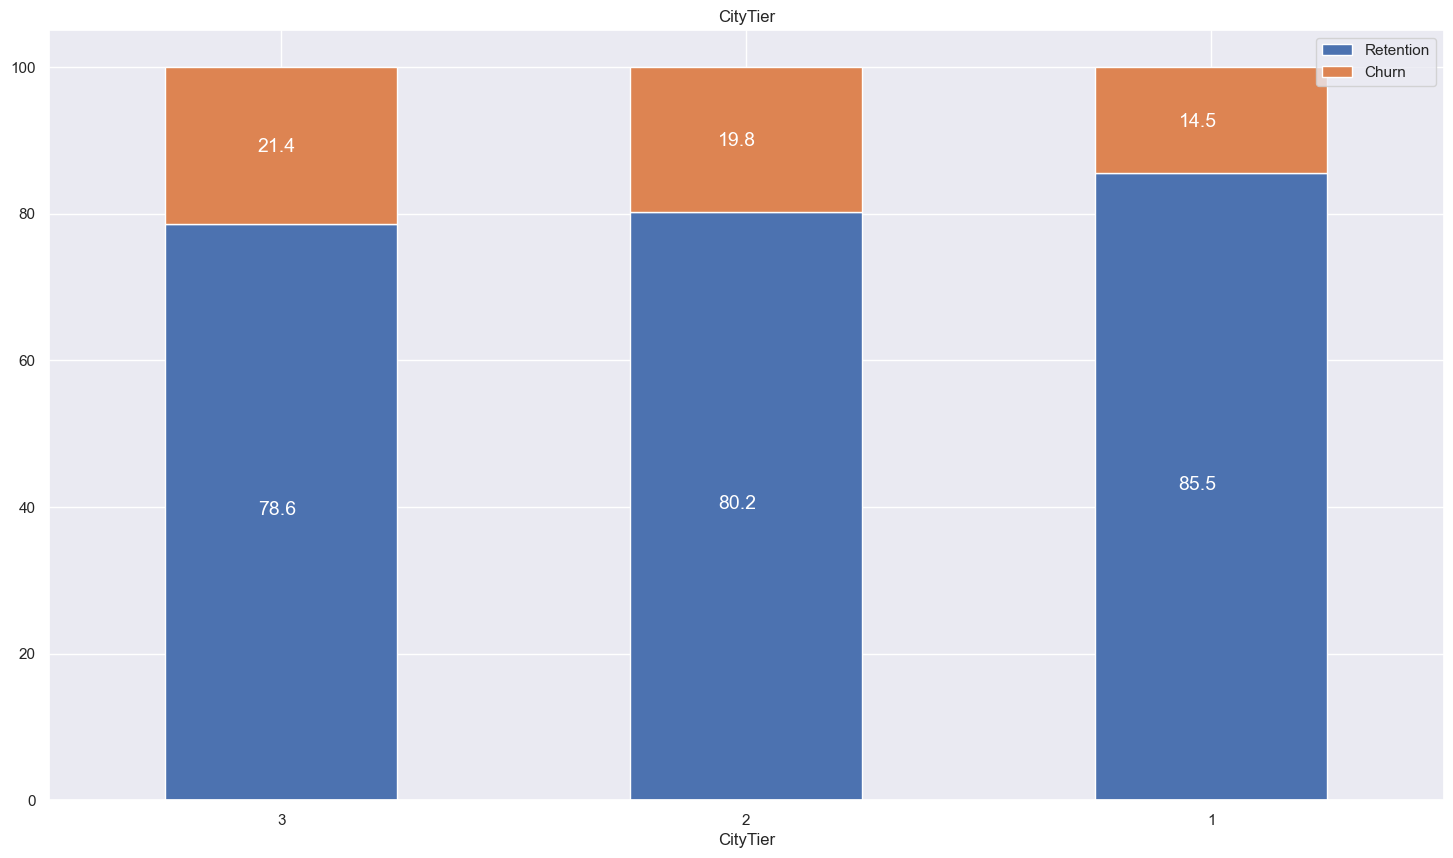

In [92]:
plot_stacked_bars(citytier_churn, 'CityTier')

The churning customers are distributed roughly evenly over City Tier 3 and City Tier 2, 21.4% and 19.8%. City Tier 1 has less churning customers, with 14.5%.

#### Gender

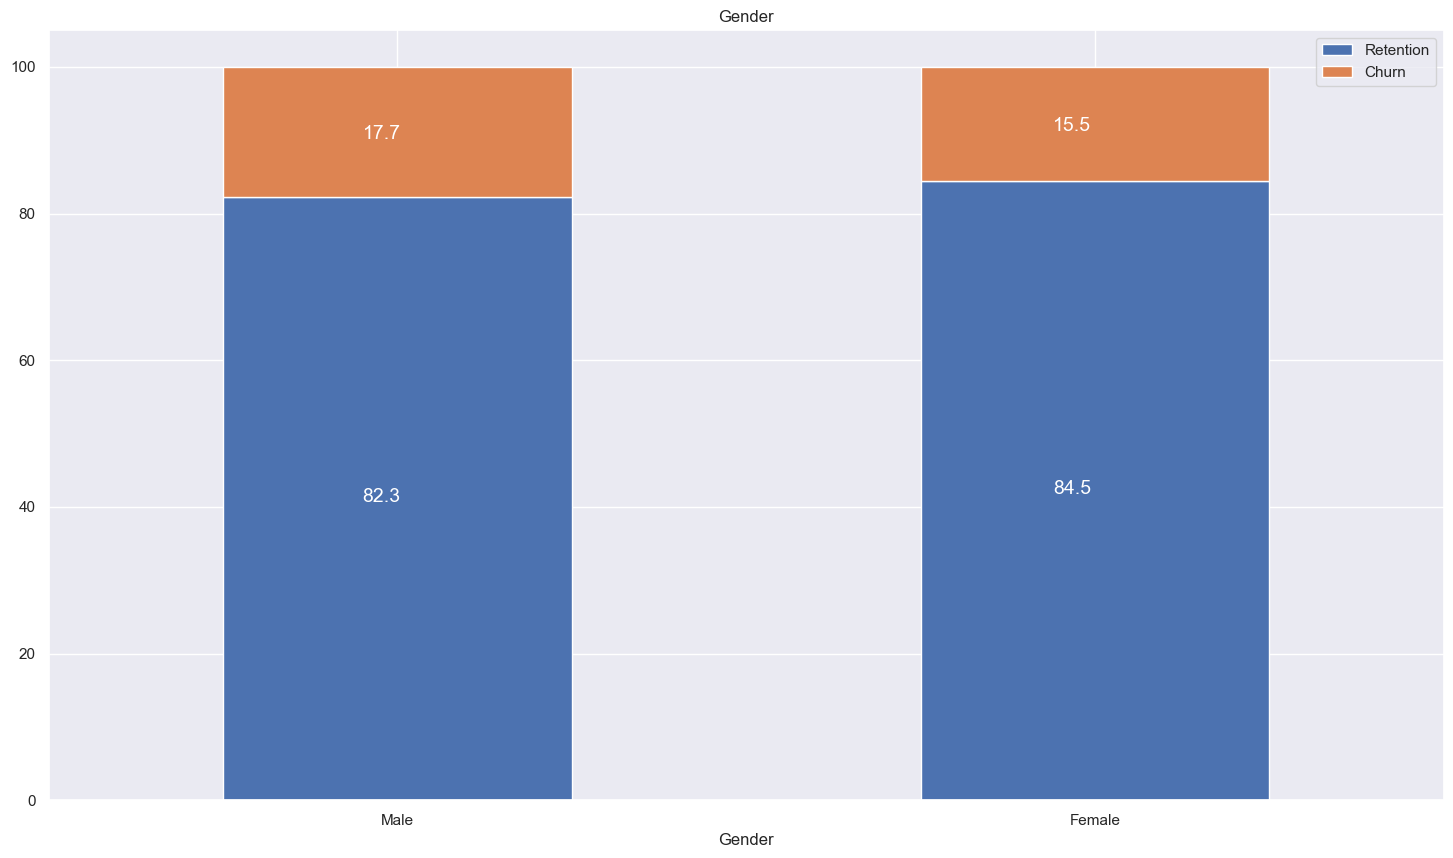

In [93]:
gender = df[['CustomerID', 'Gender', 'Churn']]
gender = gender.groupby([gender['Gender'], gender['Churn']])['CustomerID'].count().unstack(level=1).fillna(0)
gender_churn = (gender.div(gender.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

plot_stacked_bars(gender_churn, 'Gender')

Males customers have a little higher churn rate.

#### MaritalStatus

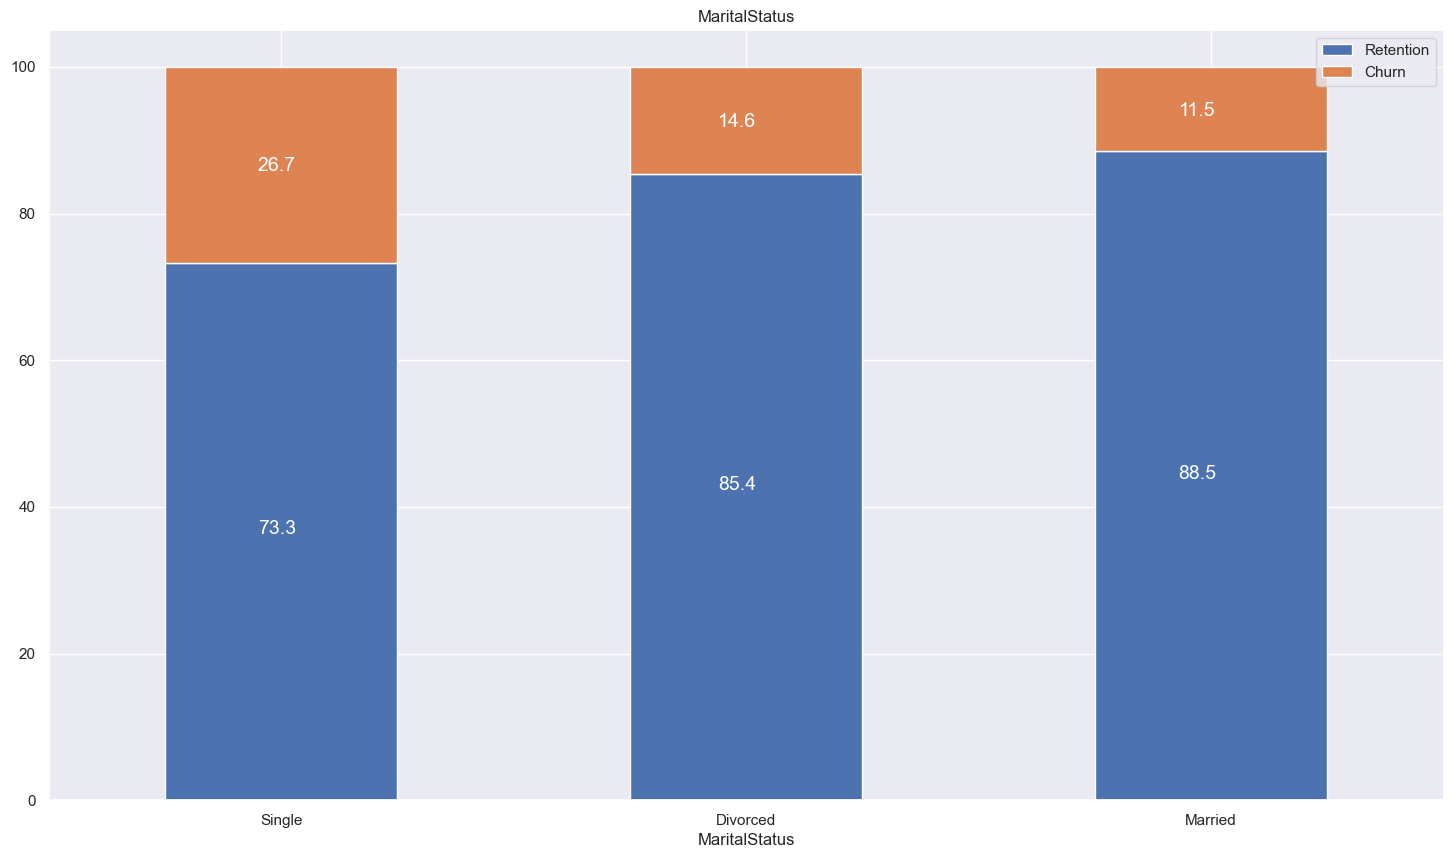

In [97]:
marital_status = df[['CustomerID', 'MaritalStatus', 'Churn']]
marital_status = marital_status.groupby([marital_status['MaritalStatus'], marital_status['Churn']])['CustomerID'].count().unstack(level=1).fillna(0)
marital_status_churn = (marital_status.div(marital_status.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

plot_stacked_bars(marital_status_churn, 'MaritalStatus')

Single customers are most likely to churn.

#### PreferredLoginDevice

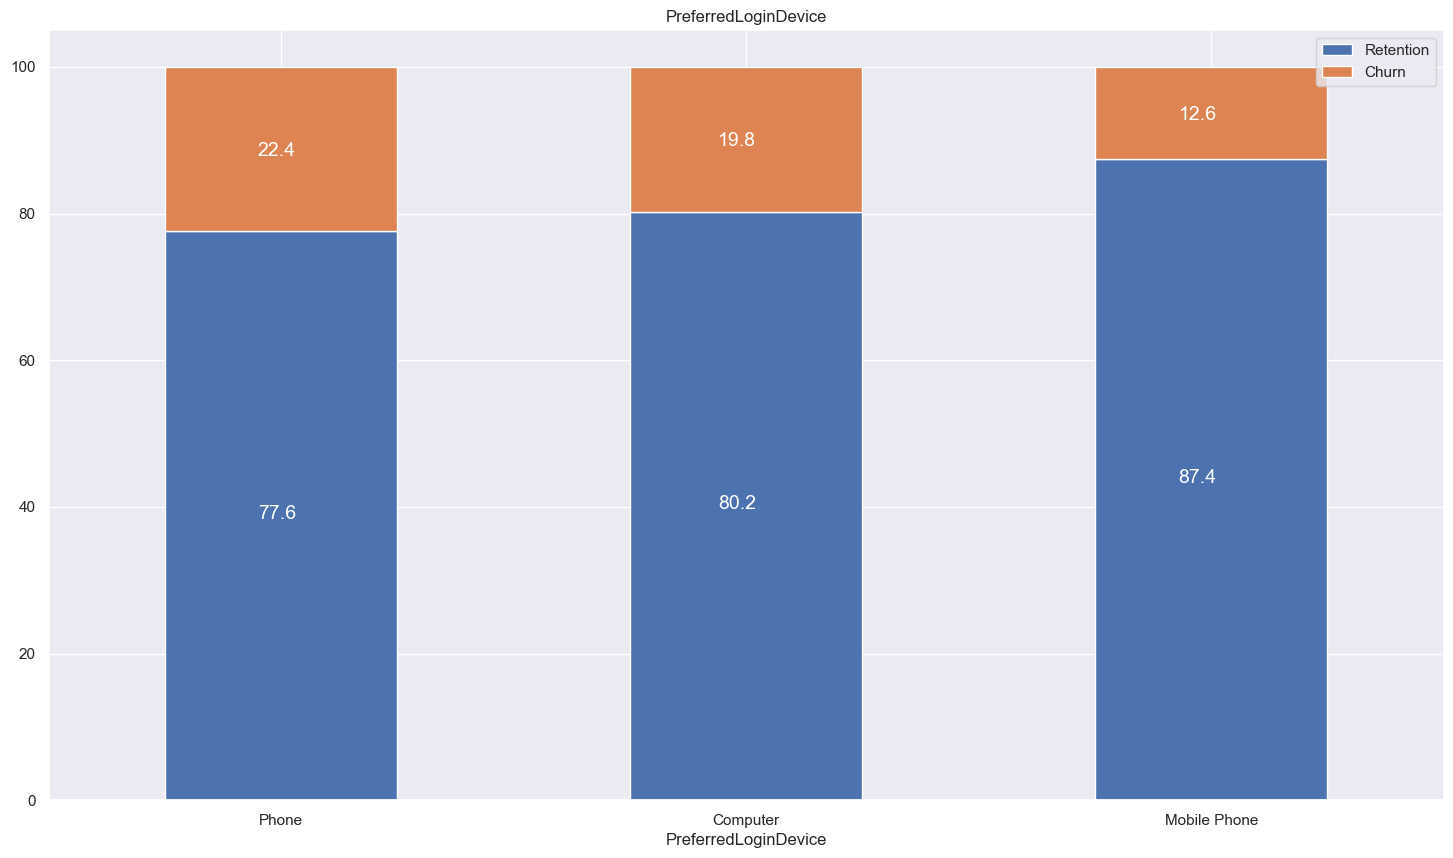

In [95]:
pld = df[['CustomerID', 'PreferredLoginDevice', 'Churn']]
pld = pld.groupby([pld['PreferredLoginDevice'], pld['Churn']])['CustomerID'].count().unstack(level=1).fillna(0)
pld_churn = (pld.div(pld.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

plot_stacked_bars(pld_churn, 'PreferredLoginDevice')

#### PreferredPaymentMode

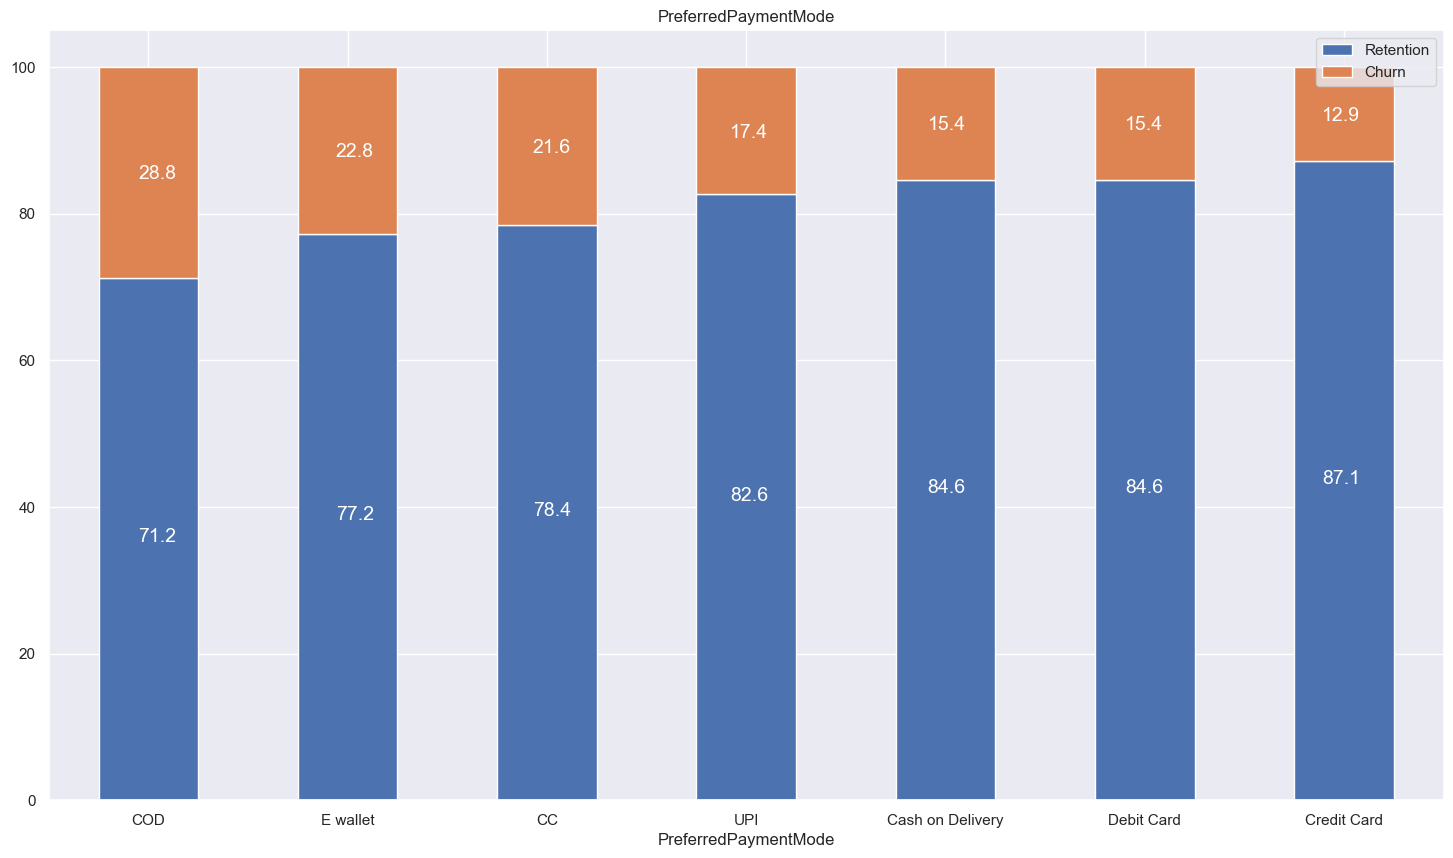

In [98]:
ppm = df[['CustomerID', 'PreferredPaymentMode', 'Churn']]
ppm = ppm.groupby([ppm['PreferredPaymentMode'], ppm['Churn']])['CustomerID'].count().unstack(level=1).fillna(0)
ppm_churn = (ppm.div(ppm.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

plot_stacked_bars(ppm_churn, 'PreferredPaymentMode')

#### PreferedOrderCat

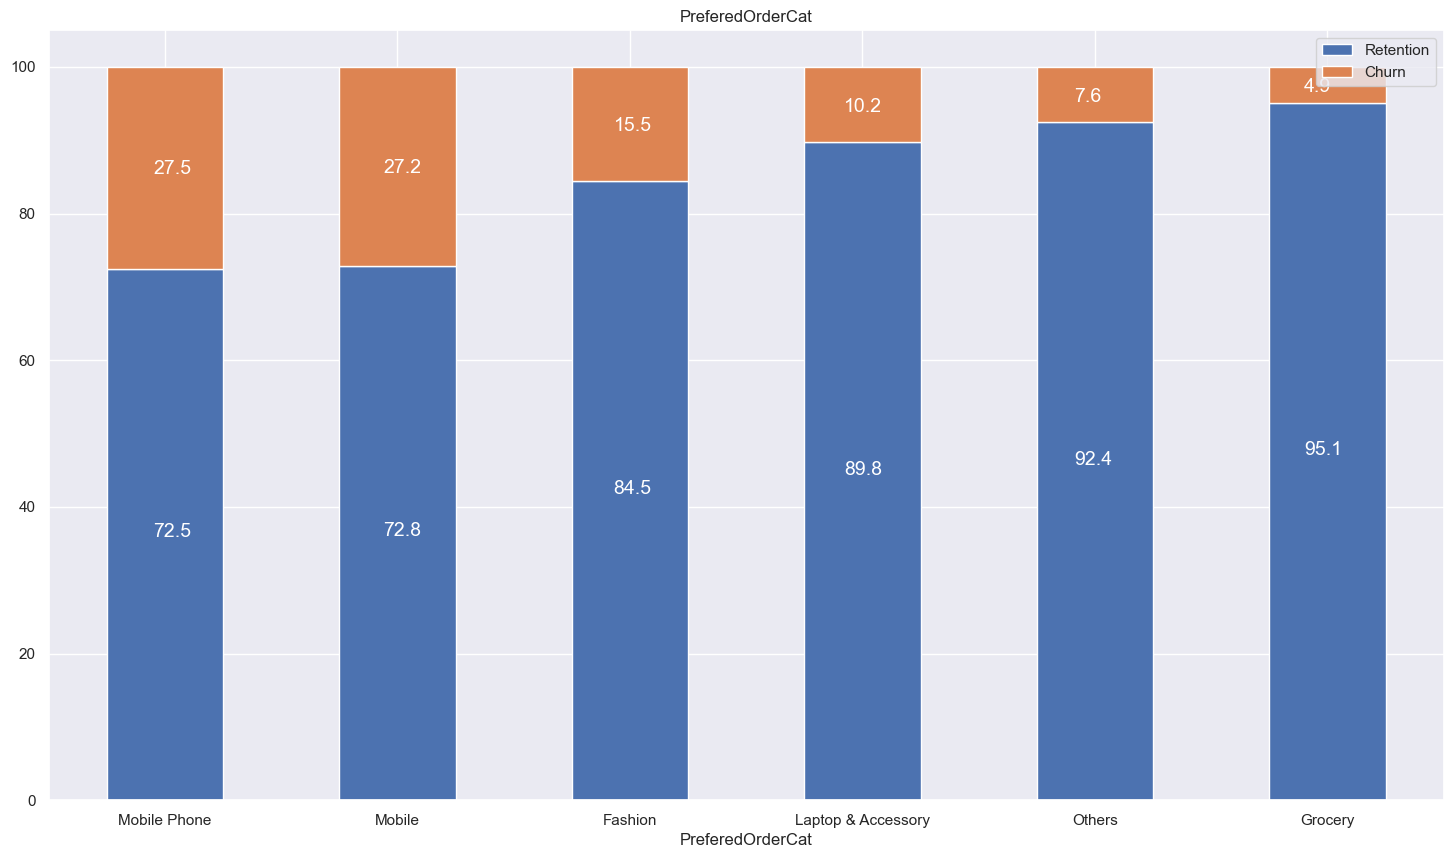

In [99]:
poc = df[['CustomerID', 'PreferedOrderCat', 'Churn']]
poc = poc.groupby([poc['PreferedOrderCat'], poc['Churn']])['CustomerID'].count().unstack(level=1).fillna(0)
poc_churn = (poc.div(poc.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

plot_stacked_bars(poc_churn, 'PreferedOrderCat')

Customers who ordered mobile phone and mobile are most likely to churn.

#### Complain

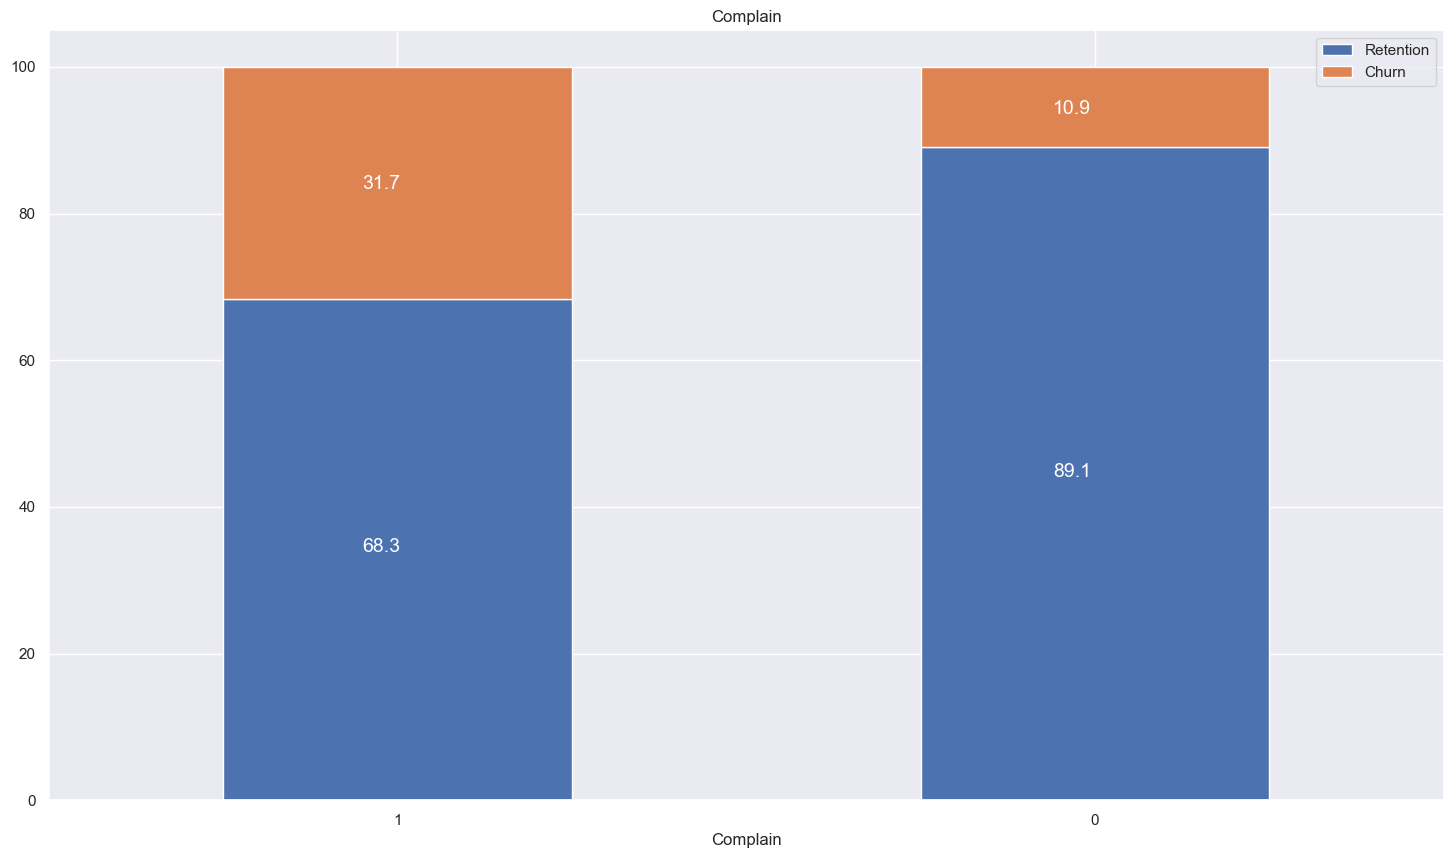

In [101]:
complain = df[['CustomerID', 'Complain', 'Churn']]
complain = complain.groupby([complain['Complain'], complain['Churn']])['CustomerID'].count().unstack(level=1).fillna(0)
complain_churn = (complain.div(complain.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

plot_stacked_bars(complain_churn, 'Complain')

Customers who complained are 3 times more likely to churn than those who did not.

### Deeper dive into numerical columns

In [ ]:
def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distribution in a stacked histogram of churned or retained customer
    """
    # Create a temporary dataframe with the data to be plot
    temp = pd.DataFrame({
        "Retention": dataframe[dataframe["Churn"]==0][column],
        "Churn":dataframe[dataframe["Churn"]==1][column]
    })
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

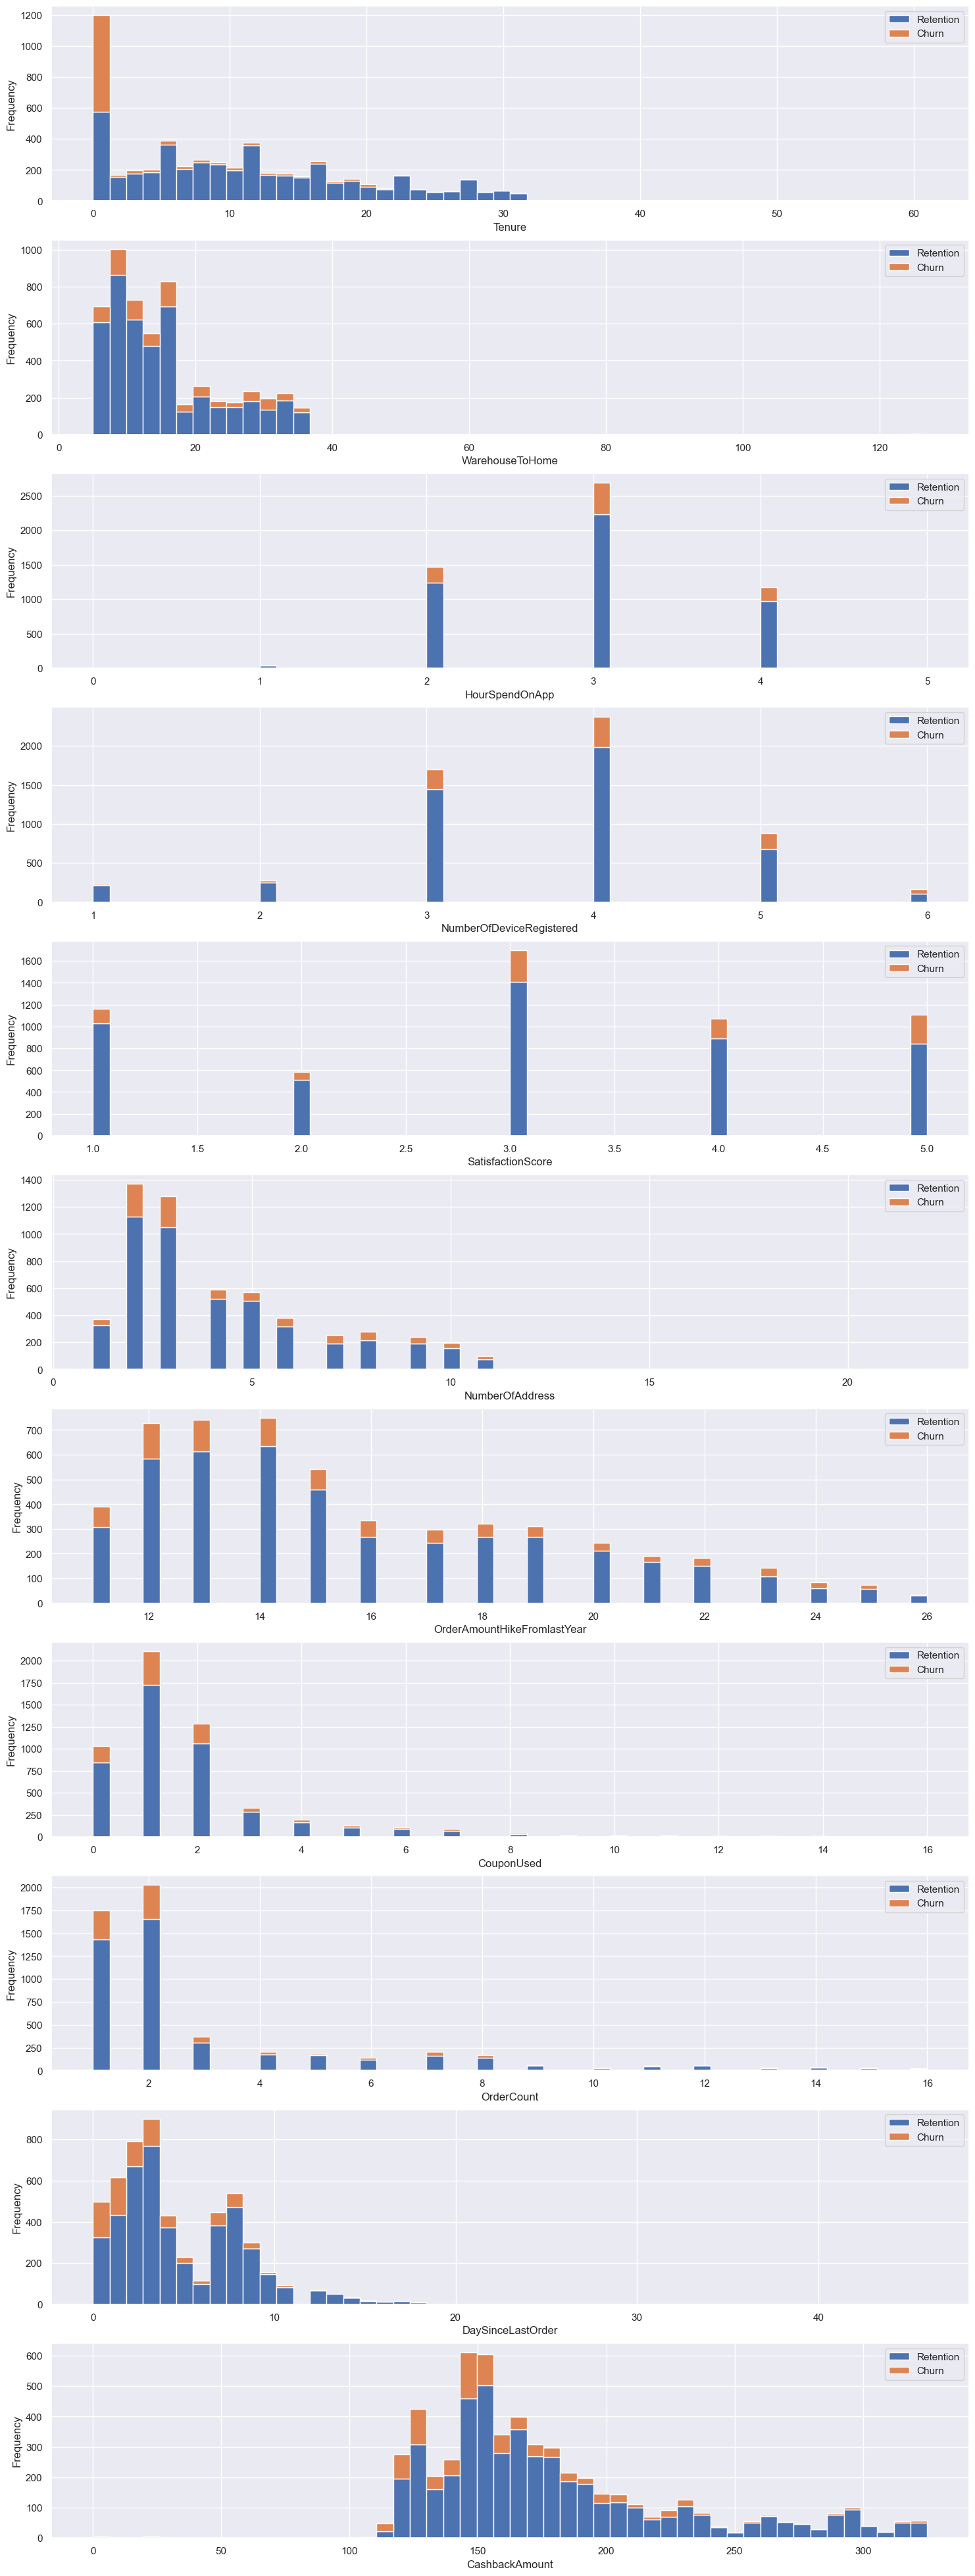

In [110]:
fig, axs = plt.subplots(nrows=11, figsize=(18,50))

# Plot histogram
plot_distribution(df, "Tenure", axs[0])
plot_distribution(df, "WarehouseToHome", axs[1])
plot_distribution(df, "HourSpendOnApp", axs[2])
plot_distribution(df, "NumberOfDeviceRegistered", axs[3])
plot_distribution(df, "SatisfactionScore", axs[4])
plot_distribution(df, "NumberOfAddress", axs[5])
plot_distribution(df, "OrderAmountHikeFromlastYear", axs[6])
plot_distribution(df, "CouponUsed", axs[7])
plot_distribution(df, "OrderCount", axs[8])
plot_distribution(df, "DaySinceLastOrder", axs[9])
plot_distribution(df, "CashbackAmount", axs[10])

plt.show()

### Summary

About 17% of the total customers churned, of which most of them belong to city tier 2 and 3 and are single. Gender has little impact on a customer's decision to churn. Most churning customers have 0 years tenure and have from 1 to 2 orders. Satisfaction score tells little about a customer's decision to churn. However, customers who complained are 3 times more likely to churn. 